In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Filtering & Sorting

## Import Data
Import the file, "dataUciOnlineRetail.csv", and save it in a variable called `df`. Then, do some initial checks of the data based on what we covered last class.

What can you say about the data?

In [2]:
import pandas as pd
df = pd.read_csv("dataUciOnlineRetail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536381,21934,SKULL SHOULDER BAG,10,12/1/2010 9:41,1.65,15311.0,United Kingdom
1,536382,22379,RECYCLING BAG RETROSPOT,10,12/1/2010 9:45,2.10,16098.0,United Kingdom
2,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 9:59,1.65,16250.0,United Kingdom
3,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,12/1/2010 10:19,0.10,17511.0,United Kingdom
4,536392,22128,PARTY CONES CANDY ASSORTED,12,12/1/2010 10:29,1.25,13705.0,United Kingdom
...,...,...,...,...,...,...,...,...
16313,581579,23201,JUMBO BAG ALPHABET,20,12/9/2011 12:19,1.79,17581.0,United Kingdom
16314,581580,21809,CHRISTMAS HANGING TREE WITH BELL,2,12/9/2011 12:20,0.39,12748.0,United Kingdom
16315,581585,22915,ASSORTED BOTTLE TOP MAGNETS,24,12/9/2011 12:31,0.19,15804.0,United Kingdom
16316,581585,16016,LARGE CHINESE STYLE SCISSOR,10,12/9/2011 12:31,0.85,15804.0,United Kingdom


## Data Profiling

Take a look at the data types for the variables in the DataFrame and get summary statistics for the quantitative variables. Is there anything you can learn from the summary stats?

In [3]:
df.dtypes
df.describe()

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

,Quantity,UnitPrice,CustomerID
count,16318.000000,16318.000000,12245.000000
mean,9.263451,5.414846,15277.889914
std,35.291780,123.424416,1717.061886
min,-1897.000000,0.000000,12347.000000
25%,1.000000,1.250000,13924.000000
50%,3.000000,2.100000,15145.000000
75%,10.000000,4.130000,16776.000000
max,1300.000000,13541.330000,18287.000000


Are there missing values?

In [4]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description      39
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4073
Country           0
dtype: int64

What countries are in the data?

In [5]:
df["Country"].value_counts()

Country
United Kingdom     14878
Germany              314
EIRE                 250
France               248
Netherlands           75
Belgium               72
Spain                 70
Switzerland           66
Portugal              53
Australia             42
Norway                31
Italy                 27
Finland               22
Channel Islands       20
Unspecified           19
Sweden                16
Denmark               13
Austria               13
Cyprus                12
Poland                11
Israel                11
USA                   10
Hong Kong              9
Japan                  9
Singapore              7
Iceland                5
RSA                    5
Malta                  3
Greece                 2
Lithuania              1
Bahrain                1
Lebanon                1
Brazil                 1
Canada                 1
Name: count, dtype: int64

Create a histogram of Quantity:

<Axes: ylabel='Frequency'>

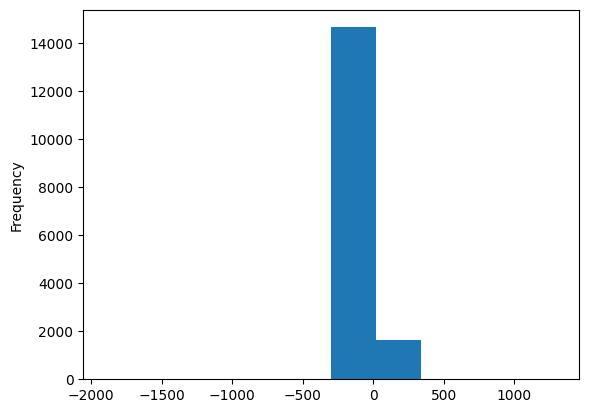

In [6]:
df["Quantity"].plot.hist()

Create a histogram of UnitPrice:

<Axes: ylabel='Frequency'>

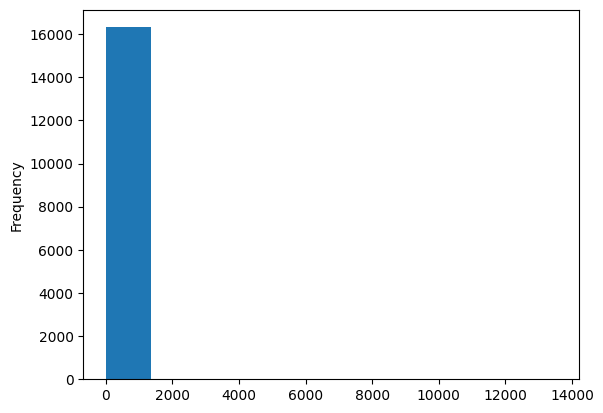

In [7]:
df["UnitPrice"].plot.hist()

Is there anything odd about the histograms? How useful are they?

## Selecting a Few Rows

Data can overwhelm. Let's look at just a few rows instead of all of them. We'll use `.loc[]` to filter our data set. The general structure of the `.loc[]` command is:
```
dataFrame.loc[rowCriteria, columnCriteria]
```
Let's start by looking at the row criteria. One way you can filter is to simply list the rows you want to see as `starting#:ending#`, like this (remember that Python starts numbering at 0):

In [8]:
df.loc[0:4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536381,21934,SKULL SHOULDER BAG,10,12/1/2010 9:41,1.65,15311.0,United Kingdom
1,536382,22379,RECYCLING BAG RETROSPOT,10,12/1/2010 9:45,2.10,16098.0,United Kingdom
2,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 9:59,1.65,16250.0,United Kingdom
3,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,12/1/2010 10:19,0.10,17511.0,United Kingdom
4,536392,22128,PARTY CONES CANDY ASSORTED,12,12/1/2010 10:29,1.25,13705.0,United Kingdom


Notice that, if you leave the column criteria empty, you will get all columns.

While you can use `.loc[]` to view specific row #'s, we usually want to filter our data based on logical criteria. For example, if I wanted to see only rows with orders from Austria:

In [9]:
df.loc[df["Country"] == "Austria"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3283,545570,POST,POSTAGE,1,3/3/2011 16:28,40.00,12817.0,Austria
5985,554132,22551,PLASTERS IN TIN SPACEBOY,12,5/23/2011 9:43,1.65,12360.0,Austria
5986,554132,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,5/23/2011 9:43,2.95,12360.0,Austria
7794,559707,48185,DOORMAT FAIRY CAKE,2,7/12/2011 10:04,7.95,12358.0,Austria
8856,562602,23142,IVORY WIRE KITCHEN ORGANISER,2,8/8/2011 10:11,10.40,12865.0,Austria
8857,562602,23150,IVORY SWEETHEART SOAP DISH,6,8/8/2011 10:11,2.49,12865.0,Austria
8858,562602,23152,IVORY SWEETHEART WIRE LETTER RACK,4,8/8/2011 10:11,3.75,12865.0,Austria
9261,563749,22814,CARD PARTY GAMES,12,8/19/2011 10:10,0.42,12360.0,Austria
12123,571705,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,10/18/2011 15:22,3.75,12360.0,Austria
12124,571705,23320,GIANT 50'S CHRISTMAS CRACKER,12,10/18/2011 15:22,2.89,12360.0,Austria


Now, you try...view only the rows where the Quantity is less than 10:

In [10]:
df.loc[df["Quantity"] < 10]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536396,20679,EDWARDIAN PARASOL RED,6,12/1/2010 10:51,4.95,17850.0,United Kingdom
6,536396,21871,SAVE THE PLANET MUG,6,12/1/2010 10:51,1.06,17850.0,United Kingdom
7,536399,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 10:52,1.85,17850.0,United Kingdom
8,536401,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,3,12/1/2010 11:21,2.95,15862.0,United Kingdom
10,536409,21676,FLOWERS STICKERS,6,12/1/2010 11:45,0.85,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
16307,581498,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,5,12/9/2011 10:26,5.79,NaN,United Kingdom
16308,581498,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,6,12/9/2011 10:26,7.46,NaN,United Kingdom
16309,581498,84375,SET OF 20 KIDS COOKIE CUTTERS,3,12/9/2011 10:26,4.13,NaN,United Kingdom
16310,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,12/9/2011 10:26,5.79,NaN,United Kingdom


If you have multiple filters that you'd like to combine, you can either use `&` or separate them out into multiple `.loc[]` commands. The following 2 lines of code do the same thing:

In [11]:
df.loc[(df["Quantity"] < 10) & (df["Country"] == "Austria")]
df.loc[df["Quantity"] < 10].loc[df["Country"] == "Austria"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3283,545570,POST,POSTAGE,1,3/3/2011 16:28,40.00,12817.0,Austria
5986,554132,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,5/23/2011 9:43,2.95,12360.0,Austria
7794,559707,48185,DOORMAT FAIRY CAKE,2,7/12/2011 10:04,7.95,12358.0,Austria
8856,562602,23142,IVORY WIRE KITCHEN ORGANISER,2,8/8/2011 10:11,10.40,12865.0,Austria
8857,562602,23150,IVORY SWEETHEART SOAP DISH,6,8/8/2011 10:11,2.49,12865.0,Austria
8858,562602,23152,IVORY SWEETHEART WIRE LETTER RACK,4,8/8/2011 10:11,3.75,12865.0,Austria
12123,571705,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,10/18/2011 15:22,3.75,12360.0,Austria
12125,571705,22367,CHILDRENS APRON SPACEBOY DESIGN,8,10/18/2011 15:22,1.95,12360.0,Austria


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3283,545570,POST,POSTAGE,1,3/3/2011 16:28,40.00,12817.0,Austria
5986,554132,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,5/23/2011 9:43,2.95,12360.0,Austria
7794,559707,48185,DOORMAT FAIRY CAKE,2,7/12/2011 10:04,7.95,12358.0,Austria
8856,562602,23142,IVORY WIRE KITCHEN ORGANISER,2,8/8/2011 10:11,10.40,12865.0,Austria
8857,562602,23150,IVORY SWEETHEART SOAP DISH,6,8/8/2011 10:11,2.49,12865.0,Austria
8858,562602,23152,IVORY SWEETHEART WIRE LETTER RACK,4,8/8/2011 10:11,3.75,12865.0,Austria
12123,571705,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,4,10/18/2011 15:22,3.75,12360.0,Austria
12125,571705,22367,CHILDRENS APRON SPACEBOY DESIGN,8,10/18/2011 15:22,1.95,12360.0,Austria


Notice that you need to use ()s to separate multiple logical statements if you are including them in a single `.loc[]` command.

If you want to combine 2 conditions with OR instead of AND, use `|` instead of `&`:

In [12]:
df.loc[(df["Quantity"] < 10) | (df["Country"] == "Austria")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536396,20679,EDWARDIAN PARASOL RED,6,12/1/2010 10:51,4.95,17850.0,United Kingdom
6,536396,21871,SAVE THE PLANET MUG,6,12/1/2010 10:51,1.06,17850.0,United Kingdom
7,536399,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 10:52,1.85,17850.0,United Kingdom
8,536401,84625C,BLUE NEW BAROQUE CANDLESTICK CANDLE,3,12/1/2010 11:21,2.95,15862.0,United Kingdom
10,536409,21676,FLOWERS STICKERS,6,12/1/2010 11:45,0.85,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
16307,581498,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,5,12/9/2011 10:26,5.79,NaN,United Kingdom
16308,581498,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,6,12/9/2011 10:26,7.46,NaN,United Kingdom
16309,581498,84375,SET OF 20 KIDS COOKIE CUTTERS,3,12/9/2011 10:26,4.13,NaN,United Kingdom
16310,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,12/9/2011 10:26,5.79,NaN,United Kingdom


You try...show the rows where the Country is Belgium and the quantity is less than 3:

In [13]:
df.loc[(df["Country"] == "Belgium") & (df["Quantity"] < 3)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4506,549559,20749,ASSORTED COLOUR MINI CASES,2,4/10/2011 13:25,7.95,12447.0,Belgium
6444,555574,23010,CIRCUS PARADE BABY GIFT SET,1,6/5/2011 15:46,16.95,12417.0,Belgium
6476,555739,20685,DOORMAT RED RETROSPOT,2,6/7/2011 9:49,7.95,12380.0,Belgium
7527,559058,22634,CHILDS BREAKFAST SET SPACEBOY,2,7/6/2011 9:49,9.95,12407.0,Belgium
9437,564378,23110,PARISIENNE KEY CABINET,2,8/25/2011 10:26,5.75,12417.0,Belgium
9438,564378,90145,SILVER HOOP EARRINGS WITH FLOWER,2,8/25/2011 10:26,5.95,12417.0,Belgium
9727,565246,22894,TABLECLOTH RED APPLES DESIGN,2,9/2/2011 10:27,9.95,12408.0,Belgium
12872,573401,POST,POSTAGE,2,10/30/2011 15:43,15.00,12364.0,Belgium
13204,574336,22692,DOORMAT WELCOME TO OUR HOME,2,11/4/2011 9:52,8.25,12397.0,Belgium


So far, we've returned all columns in our filtered commands. Now, let's use column criteria to select only a few columns. To do this, you just need to list the columns you'd like as the 2nd parameter in the `.loc[]` command:

In [14]:
df.loc[df["Quantity"] < 10, "Quantity"]
df.loc[df["Quantity"] < 10, ["Quantity", "UnitPrice"]]

5        6
6        6
7        6
8        3
10       6
        ..
16307    5
16308    6
16309    3
16310    1
16314    2
Name: Quantity, Length: 11647, dtype: int64

,Quantity,UnitPrice
5,6,4.95
6,6,1.06
7,6,1.85
8,3,2.95
10,6,0.85
...,...,...
16307,5,5.79
16308,6,7.46
16309,3,4.13
16310,1,5.79


Modify your previous code to show the rows where the Country is Belgium and the quantity is less than 3, but only display the Country and Quantity columns:

In [15]:
df.loc[(df["Country"] == "Belgium") & (df["Quantity"] < 3), ["Country", "Quantity"]]

,Country,Quantity
4506,Belgium,2
6444,Belgium,1
6476,Belgium,2
7527,Belgium,2
9437,Belgium,2
9438,Belgium,2
9727,Belgium,2
12872,Belgium,2
13204,Belgium,2


## Combining for Statistics

Now that we can filter our data, we can investigate it and summarize it in detail. In the next code block, write code to get the summary statistics for the Quantity and UnitPrice columns only, filtering for sales in the United Kingdom:

In [16]:
df.loc[df["Country"] == "United Kingdom", ["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,14878.000000,14878.000000
mean,8.213671,5.449644
std,34.486133,128.748906
min,-1897.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,1300.000000,13541.330000


We can do the same thing with visualizations. Remember that this is the histogram for the Quantity column:

<Axes: ylabel='Frequency'>

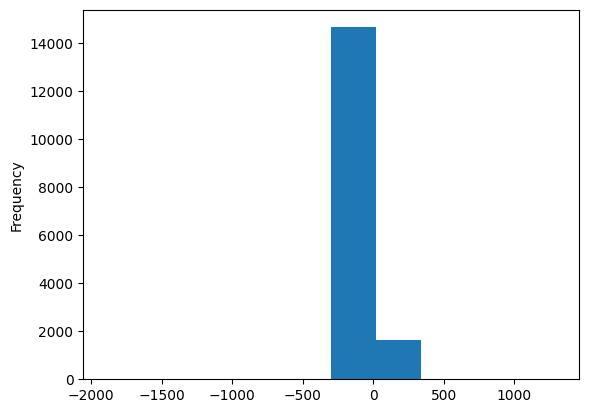

In [17]:
df["Quantity"].plot.hist()

Use the `.loc[]` command to display the histogram only for rows with a Quantity greater than 0 and less than 50:

<Axes: ylabel='Frequency'>

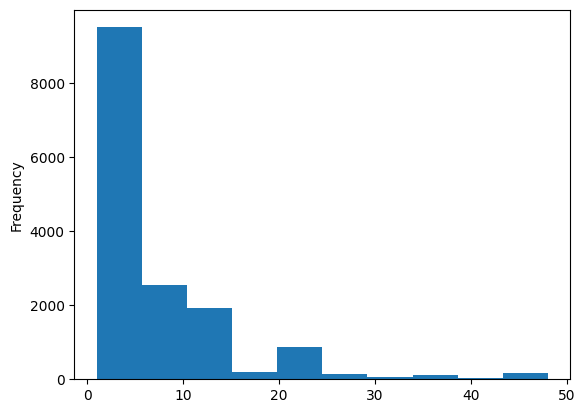

In [18]:
df.loc[(df["Quantity"] > 0) & (df["Quantity"] < 50), "Quantity"].plot.hist()

Why does this histogram look different from the original histogram of Quantity that we created up above? Which graph is more useful?

## Ordering

The `.sort_values()` method orders the results:

In [19]:
df.sort_values("UnitPrice")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
12566,572694,35810B,NaN,12,10/25/2011 14:21,0.00,NaN,United Kingdom
658,538162,46000M,Dotcom sales,-100,12/9/2010 17:25,0.00,NaN,United Kingdom
3936,547532,84227,NaN,1,3/23/2011 15:06,0.00,NaN,United Kingdom
3866,547331,17013D,NaN,-20,3/22/2011 11:41,0.00,NaN,United Kingdom
1331,539997,84689,NaN,5,1/4/2011 10:15,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
5998,554155,M,Manual,1,5/23/2011 11:26,1241.98,12757.0,Portugal
14019,576339,DOT,DOTCOM POSTAGE,1,11/14/2011 15:27,1500.36,14096.0,United Kingdom
2902,C544589,AMAZONFEE,AMAZON FEE,-1,2/21/2011 15:11,5258.77,NaN,United Kingdom
10290,C566889,AMAZONFEE,AMAZON FEE,-1,9/15/2011 13:50,5522.14,NaN,United Kingdom


The default is to sort in ascending order (low to high). If you want to switch to descending order (high to low), add the `ascending=False` parameter:

In [20]:
df.sort_values("UnitPrice", ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
434,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
10290,C566889,AMAZONFEE,AMAZON FEE,-1,9/15/2011 13:50,5522.14,NaN,United Kingdom
2902,C544589,AMAZONFEE,AMAZON FEE,-1,2/21/2011 15:11,5258.77,NaN,United Kingdom
14019,576339,DOT,DOTCOM POSTAGE,1,11/14/2011 15:27,1500.36,14096.0,United Kingdom
5998,554155,M,Manual,1,5/23/2011 11:26,1241.98,12757.0,Portugal
...,...,...,...,...,...,...,...,...
3389,545875,21736,Adjustment,34,3/7/2011 15:18,0.00,NaN,United Kingdom
3866,547331,17013D,NaN,-20,3/22/2011 11:41,0.00,NaN,United Kingdom
14305,577037,72817,dotcomstock,4,11/17/2011 13:27,0.00,NaN,United Kingdom
5650,553163,22726,NaN,1,5/13/2011 16:10,0.00,NaN,United Kingdom


If you want to sort by multiple columns, you can just list them within `.sort_values()`. For example, if I first want to sort by InvoiceDate and then by UnitPrice, I would do this:

In [21]:
df.sort_values(["InvoiceDate", "UnitPrice"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1544,540562,POST,POSTAGE,3,1/10/2011 10:35,18.00,12524.0,Germany
1545,540566,35961,FOLKART ZINC HEART CHRISTMAS DEC,1,1/10/2011 10:58,0.85,17811.0,United Kingdom
1547,540566,22520,CHILDS GARDEN TROWEL BLUE,2,1/10/2011 10:58,0.85,17811.0,United Kingdom
1546,540566,22467,GUMBALL COAT RACK,2,1/10/2011 10:58,2.55,17811.0,United Kingdom
1548,540568,84988,SET OF 72 PINK HEART PAPER DOILIES,9,1/10/2011 11:22,1.45,15039.0,United Kingdom
...,...,...,...,...,...,...,...,...
10000,566074,90184B,AMETHYST CHUNKY BEAD BRACELET W STR,4,9/9/2011 8:48,8.95,12535.0,France
10001,566076,23342,MINT DINER WALL CLOCK,6,9/9/2011 9:13,8.50,12449.0,Belgium
10002,566077,23274,STAR T-LIGHT HOLDER WILLIE WINKIE,12,9/9/2011 9:38,1.65,13441.0,United Kingdom
10003,566079,22469,HEART OF WICKER SMALL,40,9/9/2011 9:52,1.45,17593.0,United Kingdom


Now you try...filter the data to show only rows where the Quantity is less than 50 and sort the results by Quantity in ascending order (you can display all columns):

In [22]:
df.loc[df["Quantity"] < 50].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9739,565310,21829,?missing,-1897,9/2/2011 12:26,0.00,NaN,United Kingdom
6643,556319,22945,sold as set on dotcom,-618,6/10/2011 10:49,0.00,NaN,United Kingdom
3466,546018,85172,wrongly sold as sets,-600,3/8/2011 17:23,0.00,NaN,United Kingdom
14186,576765,22219,???lost,-550,11/16/2011 13:11,0.00,NaN,United Kingdom
10017,566122,23084,temp adjustment,-484,9/9/2011 10:57,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
12741,573153,84988,SET OF 72 PINK HEART PAPER DOILIES,48,10/28/2011 7:39,1.45,12678.0,France
14991,578516,22155,STAR DECORATION RUSTIC,48,11/24/2011 13:53,0.42,14591.0,United Kingdom
14992,578516,20668,DISCO BALL CHRISTMAS DECORATION,48,11/24/2011 13:53,0.12,14591.0,United Kingdom
15024,578661,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,48,11/24/2011 16:46,0.85,18188.0,United Kingdom


## Practice

Show the InvoiceDate, Quantity, and UnitPrice for transactions from the United Kingdom where the StockCode is 84029G and order it by Quantity:

In [23]:
df.loc[(df["Country"] == "United Kingdom") & (df["StockCode"] == "84029G"), 
["InvoiceDate", "Quantity", "UnitPrice"]].sort_values("Quantity")

,InvoiceDate,Quantity,UnitPrice
15769,12/4/2011 13:32,1,4.25
49,12/1/2010 14:41,2,3.75
1510,1/9/2011 11:02,2,3.75
745,12/10/2010 14:59,3,7.62
3910,3/22/2011 16:54,3,8.29
183,12/3/2010 14:18,3,3.75
11390,10/6/2011 10:48,4,4.25
12046,10/17/2011 15:18,4,4.25
16084,12/7/2011 11:27,8,4.25
694,12/10/2010 10:21,8,3.75


Show the Country, StockCode, and Quantity for transactions from either Austria or Belgium where the UnitPrice is greater than 7 in descending order by Quantity:

In [24]:
df.loc[((df["Country"] == "Austria") | (df["Country"] == "Belgium")) & 
(df["UnitPrice"] > 7), ["Country", "StockCode", "Quantity"]].sort_values("Quantity", ascending = False)

,Country,StockCode,Quantity
10001,Belgium,23342,6
6476,Belgium,20685,2
4506,Belgium,20749,2
8856,Austria,23142,2
9727,Belgium,22894,2
7794,Austria,48185,2
7527,Belgium,22634,2
12872,Belgium,POST,2
13204,Belgium,22692,2
6444,Belgium,23010,1
